<a href="https://colab.research.google.com/github/bdemirc1/chemBERT/blob/main/ChemBERTa_SMILES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# In order to use deepchem within google colab

!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3457  100  3457    0     0  12514      0 --:--:-- --:--:-- --:--:-- 12525


add /root/miniconda/lib/python3.10/site-packages to PYTHONPATH
INFO:conda_installer:add /root/miniconda/lib/python3.10/site-packages to PYTHONPATH
python version: 3.10.12
INFO:conda_installer:python version: 3.10.12
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
INFO:conda_installer:fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
INFO:conda_installer:done
installing miniconda to /root/miniconda
INFO:conda_installer:installing miniconda to /root/miniconda
done
INFO:conda_installer:done
installing openmm, pdbfixer
INFO:conda_installer:installing openmm, pdbfixer
added conda-forge to channels
INFO:conda_installer:added conda-forge to channels
done
INFO:conda_installer:done
conda packages installation finished!
INFO:conda_installer:conda packages installation finished!


# conda environments:
#
base                     /root/miniconda



In [3]:
# Deepchem library consists of necessary modules
!pip install --pre deepchem
import deepchem
deepchem.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.0/954.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 29.2 MB/s eta 0:00:00


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


'2.7.2.dev'

In [4]:
# Nvidia Apex for dealing with 16-bit training-less memory but mixed precision training
# Apex alleviates these problems.
!git clone https://github.com/NVIDIA/apex
%cd apex
!pwd


Cloning into 'apex'...
remote: Enumerating objects: 11584, done.
remote: Counting objects: 100% (3677/3677), done.
remote: Compressing objects: 100% (531/531), done.
remote: Total 11584 (delta 3340), reused 3253 (delta 3143), pack-reused 7907
Receiving objects: 100% (11584/11584), 15.45 MiB | 18.16 MiB/s, done.
Resolving deltas: 100% (8142/8142), done.
/content/apex
/content/apex


In [5]:
!pip install -v --disable-pip-version-check --no-cache-dir --global-option="bdist_wheel" --global-option="--cpp_ext" --global-option="--cuda_ext" ./

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
DEPRECATION: --build-option and --global-option are deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859
Processing /content/apex
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.1 MB/s eta 0:00:00
    Getting requirements to build wheel: started
    Running command Getting requirements to build wheel
    running egg_info
    writing setuptools.egg-info/PKG-INFO
    writing dependency_links to setuptools.egg-info/dependency_links.txt
    writing entry points to setuptools.egg-info/entry_points.txt
    writing requirements to setuptools.egg-info/requires.txt
    writing top-level names to setuptools.egg-info/top_level.txt
    readin

In [6]:
# Required for simple transformer classification model - trained using f16 - true: 16 bit
from apex import amp

In [7]:
%cd ..
!git clone https://github.com/seyonechithrananda/bert-loves-chemistry.git

/content
Cloning into 'bert-loves-chemistry'...
remote: Enumerating objects: 1566, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 1566 (delta 96), reused 92 (delta 91), pack-reused 1364
Receiving objects: 100% (1566/1566), 55.35 MiB | 12.80 MiB/s, done.
Resolving deltas: 100% (1000/1000), done.
Updating files: 100% (122/122), done.


In [8]:
!pip install transformers
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.7/250.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 33.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.1/254.1 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 40.8 

In [9]:
!nvidia-smi

Thu Jan 18 03:22:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [10]:
%cd /content/bert-loves-chemistry

/content/bert-loves-chemistry


In [11]:
!pwd

/content/bert-loves-chemistry


In [12]:
import os

import numpy as np
import pandas as pd

from deepchem.molnet import load_bbbp, load_clearance, load_clintox, load_delaney, load_hiv, load_qm7, load_tox21
from rdkit import Chem


# import MolNet dataloder from bert-loves-chemistry
from chemberta.utils.molnet_dataloader import load_molnet_dataset, write_molnet_dataset_for_chemprop


In [13]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")  # GPU available
else:
    device = torch.device("cpu")  # No GPU, fall back to CPU


In [14]:
df_density = pd.read_csv("../10k_dft_density_data.csv")
print(df_density.dtypes)
df_density.info

smiles      object
density    float64
dtype: object


<bound method DataFrame.info of                                                   smiles   density
0                           CC(C)OC(=O)c1ccc(cc1)N(=O)=O  1.367633
1                 CCc1ccc(cc1)C=C(COc1ccccc1C=NO)C(=O)OC  1.292618
2                              CC(C)(C)c1ccc(O)c(C=NO)c1  1.227993
3                      Cc1ccccc1NN=C(C)c1cccc(c1)N(=O)=O  1.316755
4      CN(C)c1ccc(cc1)C(=C(C#N)C#N)C(c1ccc(cc1)N(=O)=...  1.406207
...                                                  ...       ...
10201         CON1C(=C(OC(C)=O)C(=C1C=Cc1ccccc1)C(C)=O)C  1.299822
10202                        CON=C(C)C(=O)C=CC=Cc1ccccc1  1.220360
10203                          CON=C(C)C(=O)C=CC1=CC=CN1  1.261450
10204      CN(c1ccccn1)c1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)=O  1.579706
10205  Cc1c(nc2CC(C)(C)CC(=O)c2c1c1ccc(cc1)N(=O)=O)c1...  1.333787

[10206 rows x 2 columns]>

In [15]:
new_column_names = {
    "smiles": "text",
    "density": "labels",
}
df_density.rename(columns=new_column_names, inplace=True)
df_density

text    labels
0                           CC(C)OC(=O)c1ccc(cc1)N(=O)=O  1.367633
1                 CCc1ccc(cc1)C=C(COc1ccccc1C=NO)C(=O)OC  1.292618
2                              CC(C)(C)c1ccc(O)c(C=NO)c1  1.227993
3                      Cc1ccccc1NN=C(C)c1cccc(c1)N(=O)=O  1.316755
4      CN(C)c1ccc(cc1)C(=C(C#N)C#N)C(c1ccc(cc1)N(=O)=...  1.406207
...                                                  ...       ...
10201         CON1C(=C(OC(C)=O)C(=C1C=Cc1ccccc1)C(C)=O)C  1.299822
10202                        CON=C(C)C(=O)C=CC=Cc1ccccc1  1.220360
10203                          CON=C(C)C(=O)C=CC1=CC=CN1  1.261450
10204      CN(c1ccccn1)c1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)=O  1.579706
10205  Cc1c(nc2CC(C)(C)CC(=O)c2c1c1ccc(cc1)N(=O)=O)c1...  1.333787

[10206 rows x 2 columns]

In [16]:
labels_mean = df_density['labels'].mean()
labels_std = df_density['labels'].std()

df_density['labels'] = (df_density['labels'] - labels_mean) / labels_std

print(df_density)

                                                    text    labels
0                           CC(C)OC(=O)c1ccc(cc1)N(=O)=O -0.248155
1                 CCc1ccc(cc1)C=C(COc1ccccc1C=NO)C(=O)OC -0.884582
2                              CC(C)(C)c1ccc(O)c(C=NO)c1 -1.432860
3                      Cc1ccccc1NN=C(C)c1cccc(c1)N(=O)=O -0.679806
4      CN(C)c1ccc(cc1)C(=C(C#N)C#N)C(c1ccc(cc1)N(=O)=...  0.079108
...                                                  ...       ...
10201         CON1C(=C(OC(C)=O)C(=C1C=Cc1ccccc1)C(C)=O)C -0.823465
10202                        CON=C(C)C(=O)C=CC=Cc1ccccc1 -1.497615
10203                          CON=C(C)C(=O)C=CC1=CC=CN1 -1.149008
10204      CN(c1ccccn1)c1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)=O  1.551068
10205  Cc1c(nc2CC(C)(C)CC(=O)c2c1c1ccc(cc1)N(=O)=O)c1... -0.535304

[10206 rows x 2 columns]


In [17]:
from sklearn.model_selection import train_test_split

train_density_df, temp_density_df = train_test_split(df_density, test_size=0.2, random_state=42)
validation_density_df, test_density_df = train_test_split(temp_density_df, test_size=0.5, random_state=42)

In [18]:
# Fetch Smiles tokenizer - vocab per line
!wget https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/vocab.txt

--2024-01-18 03:22:56--  https://deepchemdata.s3-us-west-1.amazonaws.com/datasets/vocab.txt
Resolving deepchemdata.s3-us-west-1.amazonaws.com (deepchemdata.s3-us-west-1.amazonaws.com)... 3.5.162.13, 52.219.220.250, 52.219.193.178, ...
Connecting to deepchemdata.s3-us-west-1.amazonaws.com (deepchemdata.s3-us-west-1.amazonaws.com)|3.5.162.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3524 (3.4K) [text/plain]
Saving to: ‘vocab.txt’

vocab.txt           100%[===================>]   3.44K  --.-KB/s    in 0s      

2024-01-18 03:22:56 (240 MB/s) - ‘vocab.txt’ saved [3524/3524]



In [23]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs
import logging
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)
import wandb

In [33]:
model_args = ClassificationArgs()
model_args.regression = True
#model_args.evaluate_each_epoch = True
#model_args.evaluate_during_training_verbose = True
model_args.no_save = True
model_args.show_running_loss = True
model_args.num_train_epochs = 2
model_args.wandb_project = 'chemBert-TvE2'
model_args.overwrite_output_dir = True
model_args.learning_rate = 4e-5
model_args.config = {"dropout": 0.2}

In [22]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [34]:
# seyonec/ChemBERTA_PubChem1M_shard00_155k
# seyonec/SMILES_tokenized_PubChem_shard00_160k
model = ClassificationModel(
    "roberta",
    "seyonec/SMILES_tokenized_PubChem_shard00_160k",
    num_labels=1,
    args=model_args
)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at seyonec/SMILES_tokenized_PubChem_shard00_160k and are newly initialized: ['classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [26]:
# No grad
result, model_outputs, _ = model.eval_model(validation_density_df)
result['eval_loss']

  0%|          | 0/1021 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/128 [00:00<?, ?it/s]

0.9851354656857438

In [35]:
# Cross Entropy Loss - Eval_loss
epochs = 10

for epoch in range(epochs):
    model.train_model(train_density_df)

    result, model_outputs, _ = model.eval_model(validation_density_df)

    print(f"Epoch {epoch + 1}/{epochs}, Evaluation Loss: {result['eval_loss']}")

  0%|          | 0/8164 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

  0%|          | 0/1021 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1/10, Evaluation Loss: 0.011092847532381711


  0%|          | 0/8164 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

  0%|          | 0/1021 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/128 [00:00<?, ?it/s]

Epoch 2/10, Evaluation Loss: 0.009134520709267235


  0%|          | 0/8164 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

  0%|          | 0/1021 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/128 [00:00<?, ?it/s]

Epoch 3/10, Evaluation Loss: 0.008656940860873874


  0%|          | 0/8164 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

  0%|          | 0/1021 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/128 [00:00<?, ?it/s]

Epoch 4/10, Evaluation Loss: 0.0070860279083717614


  0%|          | 0/8164 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

  0%|          | 0/1021 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/128 [00:00<?, ?it/s]

Epoch 5/10, Evaluation Loss: 0.006349115481043555


  0%|          | 0/8164 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

  0%|          | 0/1021 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/128 [00:00<?, ?it/s]

Epoch 6/10, Evaluation Loss: 0.007404659037092642


  0%|          | 0/8164 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

  0%|          | 0/1021 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/128 [00:00<?, ?it/s]

Epoch 7/10, Evaluation Loss: 0.007397146638140839


  0%|          | 0/8164 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

  0%|          | 0/1021 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/128 [00:00<?, ?it/s]

Epoch 8/10, Evaluation Loss: 0.007766962247842457


  0%|          | 0/8164 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

  0%|          | 0/1021 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/128 [00:00<?, ?it/s]

Epoch 9/10, Evaluation Loss: 0.007238687905555707


  0%|          | 0/8164 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/1021 [00:00<?, ?it/s]

  0%|          | 0/1021 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/128 [00:00<?, ?it/s]

Epoch 10/10, Evaluation Loss: 0.008143033936903521


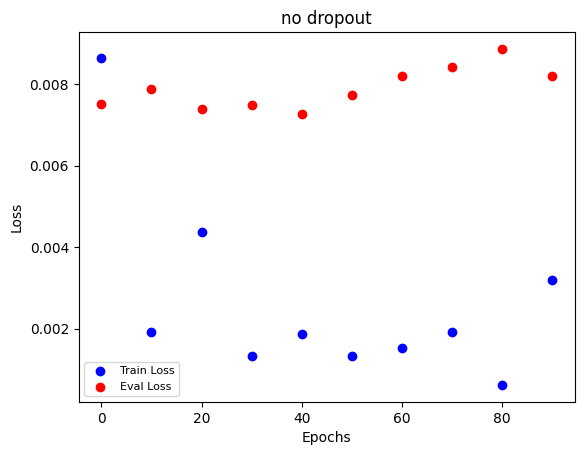

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = list(range(0, 100, 10))

t_loss = [0.00865, 0.00191, 0.00436, 0.00134, 	0.00186, 0.00134, 0.00152, 0.00193,0.00062,0.0032]
e_loss = [0.007516, 0.00789, 0.00738, 0.007485, 0.007256, 0.007731,0.0082009,0.008415, 0.008862, 0.008208]


plt.scatter(epochs, t_loss, label='Train Loss', color='blue')
plt.scatter(epochs, e_loss, label='Eval Loss', color='red')

#plt.ylim(0, 0.05)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("no dropout")
plt.legend(fontsize=8)
plt.show()



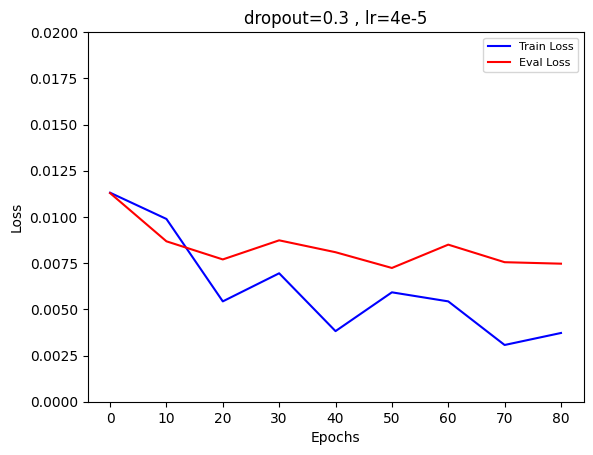

In [39]:
epochs = list(range(0, 90, 10))

t_loss = [0.01131, 0.00989, 0.00543, 0.00695, 0.00382, 0.00592, 0.00543, 0.00307, 0.00372]
e_loss = [0.01129, 0.00868, 0.0077, 0.008733,  0.00809, 0.007238, 0.00850, 0.00755, 0.00747]

plt.plot(epochs, t_loss, label='Train Loss', color='blue')
plt.plot(epochs, e_loss, label='Eval Loss', color='red')

plt.ylim(0, 0.02)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("dropout=0.3 , lr=4e-5")
plt.legend(fontsize=8)
plt.show()

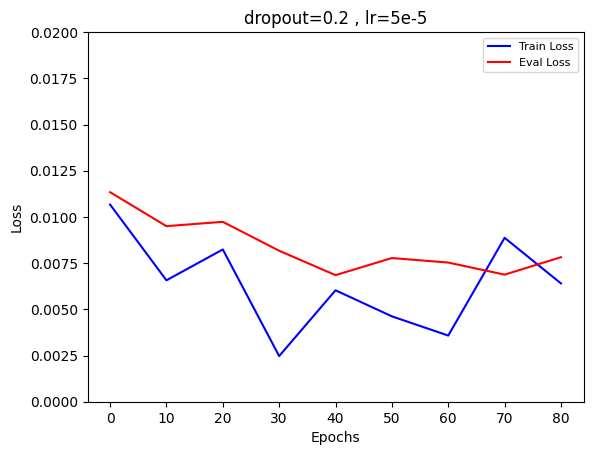

In [40]:
epochs = list(range(0, 90, 10))

t_loss = [0.01067, 0.00657, 0.00824, 0.00247, 0.00603, 0.00462, 0.00358, 0.00887, 0.0064]
e_loss = [0.01134, 0.0095, 0.009735, 0.00817, 0.00685, 0.007775, 0.007530, 0.006877, 0.00782]

plt.plot(epochs, t_loss, label='Train Loss', color='blue')
plt.plot(epochs, e_loss, label='Eval Loss', color='red')

plt.ylim(0, 0.02)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("dropout=0.2 , lr=5e-5")
plt.legend(fontsize=8)
plt.show()

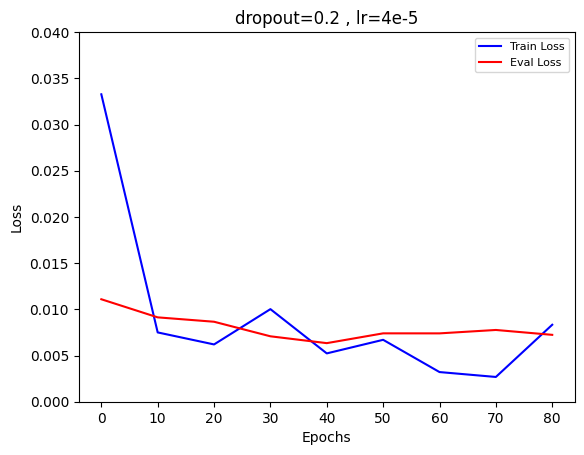

In [42]:
epochs = list(range(0, 90, 10))

t_loss = [0.03327, 0.0075, 0.0062, 0.01002, 0.00523, 0.0067, 0.00321, 0.00268, 0.00833 ]
e_loss = [0.01109, 0.00913, 0.008656, 0.00708, 0.00634, 0.00740, 0.007397, 0.007766, 0.007238 ]

plt.plot(epochs, t_loss, label='Train Loss', color='blue')
plt.plot(epochs, e_loss, label='Eval Loss', color='red')

plt.ylim(0, 0.04)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("dropout=0.2 , lr=4e-5")
plt.legend(fontsize=8)
plt.show()


In [ ]:
# RMSE
epochs = 10

for epoch in range(epochs):
    model.train_model(train_density_df)

    result, model_outputs, _ = model.eval_model(validation_density_df)

    # 'rmse'
    targets = np.array(validation_density_df['labels'])
    predictions = model_outputs.flatten()
    squared_errors = np.square(predictions - targets)
    mse = np.mean(squared_errors)
    rmse = np.sqrt(mse) * labels_std

    print(f"Epoch {epoch + 1}/{epochs}, Evaluation RMSE: {rmse}")

  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 1/10, Evaluation RMSE: 0.13887968836068582


  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 2/10, Evaluation RMSE: 0.12118422914105365


  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 3/10, Evaluation RMSE: 0.1114137277977435


  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 4/10, Evaluation RMSE: 0.11760599126725374


  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 5/10, Evaluation RMSE: 0.10473079753288313


  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 6/10, Evaluation RMSE: 0.10329813140250572


  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 7/10, Evaluation RMSE: 0.10216474775532042


  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 8/10, Evaluation RMSE: 0.09935624484793662


  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 9/10, Evaluation RMSE: 0.10369680853925162


  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

Epoch 10/10, Evaluation RMSE: 0.09589894319966986


In [ ]:
for epoch in range(5):
    model.train_model(train_density_df, wandb_log=True)

    # Evaluate on the validation dataset and log the validation loss
    result_val, _, _ = model.eval_model(validation_density_df)
    val_loss = result_val["eval_loss"]
    eval_loss_values.append(val_loss)
    print(f"Epoch {epoch + 1}, Evaluation Loss: {val_loss}")

    # Evaluate on the test dataset and log the test loss
    ''' result_test, _, _ = model.eval_model(test_density_df, wandb_log=True)
    test_loss = result_test["eval_loss"]
    wandb.log({"test_loss": test_loss}, step=epoch) '''
wandb.finish()

  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/893 [00:00<?, ?it/s]

In [ ]:
train_loss = pd.read_csv("../chembertaTrainLoss.csv")
train_loss
new_column_names = {
    "stilted-universe-2 - Training loss": "train_loss",
}
train_loss.rename(columns=new_column_names, inplace=True)
train_loss

Step  train_loss  stilted-universe-2 - Training loss__MIN  \
0       0    0.381652                                 0.381652   
1       1    0.519243                                 0.519243   
2       2    0.285380                                 0.285380   
3       3    0.069208                                 0.069208   
4       4    0.222384                                 0.222384   
..    ...         ...                                      ...   
173   173    0.004387                                 0.004387   
174   174    0.005551                                 0.005551   
175   175    0.006926                                 0.006926   
176   176    0.003486                                 0.003486   
177   177    0.003809                                 0.003809   

     stilted-universe-2 - Training loss__MAX  
0                                   0.381652  
1                                   0.519243  
2                                   0.285380  
3                                   0.069208  
4                                   0.222384  
..                                       ...  
173                                 0.004387  
174                                 0.005551  
175                                 0.006926  
176                                 0.003486  
177                                 0.003809  

[178 rows x 4 columns]

In [ ]:
# HoF Data
df_hof = pd.read_csv("../10k_dft_hof_data.csv")
df_hof.dtypes
df_hof.info

<bound method DataFrame.info of                                                   smiles       hof_s
0                           CC(C)OC(=O)c1ccc(cc1)N(=O)=O -109.985346
1                 CCc1ccc(cc1)C=C(COc1ccccc1C=NO)C(=O)OC -100.962611
2                              CC(C)(C)c1ccc(O)c(C=NO)c1  -55.199618
3                      Cc1ccccc1NN=C(C)c1cccc(c1)N(=O)=O   34.675794
4      CN(C)c1ccc(cc1)C(=C(C#N)C#N)C(c1ccc(cc1)N(=O)=...   49.411500
...                                                  ...         ...
10201         CON1C(=C(OC(C)=O)C(=C1C=Cc1ccccc1)C(C)=O)C  -99.026131
10202                        CON=C(C)C(=O)C=CC=Cc1ccccc1  -12.290865
10203                          CON=C(C)C(=O)C=CC1=CC=CN1  -12.217791
10204      CN(c1ccccn1)c1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)=O   29.753252
10205  Cc1c(nc2CC(C)(C)CC(=O)c2c1c1ccc(cc1)N(=O)=O)c1...  -33.978039

[10206 rows x 2 columns]>

In [ ]:
new_column_names = {
    "smiles": "text",
    "hof_s": "labels",
}
df_hof.rename(columns=new_column_names, inplace=True)
df_hof

text      labels
0                           CC(C)OC(=O)c1ccc(cc1)N(=O)=O -109.985346
1                 CCc1ccc(cc1)C=C(COc1ccccc1C=NO)C(=O)OC -100.962611
2                              CC(C)(C)c1ccc(O)c(C=NO)c1  -55.199618
3                      Cc1ccccc1NN=C(C)c1cccc(c1)N(=O)=O   34.675794
4      CN(C)c1ccc(cc1)C(=C(C#N)C#N)C(c1ccc(cc1)N(=O)=...   49.411500
...                                                  ...         ...
10201         CON1C(=C(OC(C)=O)C(=C1C=Cc1ccccc1)C(C)=O)C  -99.026131
10202                        CON=C(C)C(=O)C=CC=Cc1ccccc1  -12.290865
10203                          CON=C(C)C(=O)C=CC1=CC=CN1  -12.217791
10204      CN(c1ccccn1)c1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)=O   29.753252
10205  Cc1c(nc2CC(C)(C)CC(=O)c2c1c1ccc(cc1)N(=O)=O)c1...  -33.978039

[10206 rows x 2 columns]

In [ ]:
labels_mean = df_hof['labels'].mean()
labels_std = df_hof['labels'].std()

df_hof['labels'] = (df_hof['labels'] - labels_mean) / labels_std

print(df_hof)

                                                    text    labels
0                           CC(C)OC(=O)c1ccc(cc1)N(=O)=O -0.396132
1                 CCc1ccc(cc1)C=C(COc1ccccc1C=NO)C(=O)OC -0.312696
2                              CC(C)(C)c1ccc(O)c(C=NO)c1  0.110488
3                      Cc1ccccc1NN=C(C)c1cccc(c1)N(=O)=O  0.941594
4      CN(C)c1ccc(cc1)C(=C(C#N)C#N)C(c1ccc(cc1)N(=O)=...  1.077860
...                                                  ...       ...
10201         CON1C(=C(OC(C)=O)C(=C1C=Cc1ccccc1)C(C)=O)C -0.294789
10202                        CON=C(C)C(=O)C=CC=Cc1ccccc1  0.507279
10203                          CON=C(C)C(=O)C=CC1=CC=CN1  0.507955
10204      CN(c1ccccn1)c1c(cc(cc1N(=O)=O)N(=O)=O)N(=O)=O  0.896074
10205  Cc1c(nc2CC(C)(C)CC(=O)c2c1c1ccc(cc1)N(=O)=O)c1...  0.306731

[10206 rows x 2 columns]


In [ ]:
train_hof_df, temp_hof_df = train_test_split(df_hof, test_size=0.3, random_state=42)
validation_hof_df, test_hof_df = train_test_split(temp_hof_df, test_size=0.5, random_state=42)

In [ ]:
model_args = ClassificationArgs()
model_args.regression = True
model_args.evaluate_each_epoch = True
model_args.evaluate_during_training_verbose = True
model_args.no_save = True
model_args.num_train_epochs = 10
model_args.wandb_project = 'chemBert10k-smiles'
model_args.overwrite_output_dir = True

In [ ]:
model = ClassificationModel(
    "roberta",
    'seyonec/SMILES_tokenized_PubChem_shard00_160k',
    num_labels=1,
    args=model_args
)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at seyonec/SMILES_tokenized_PubChem_shard00_160k and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Train the model
model.train_model(train_hof_df)

  0%|          | 0/7144 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Running Epoch 0 of 10:   0%|          | 0/893 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Running Epoch 1 of 10:   0%|          | 0/893 [00:00<?, ?it/s]

Running Epoch 2 of 10:   0%|          | 0/893 [00:00<?, ?it/s]

Running Epoch 3 of 10:   0%|          | 0/893 [00:00<?, ?it/s]

Running Epoch 4 of 10:   0%|          | 0/893 [00:00<?, ?it/s]

Running Epoch 5 of 10:   0%|          | 0/893 [00:00<?, ?it/s]

Running Epoch 6 of 10:   0%|          | 0/893 [00:00<?, ?it/s]

Running Epoch 7 of 10:   0%|          | 0/893 [00:00<?, ?it/s]

Running Epoch 8 of 10:   0%|          | 0/893 [00:00<?, ?it/s]

Running Epoch 9 of 10:   0%|          | 0/893 [00:00<?, ?it/s]

(8930, 0.053421928242993806)

In [ ]:
# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(validation_hof_df)

  0%|          | 0/1531 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/192 [00:00<?, ?it/s]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

text_inputs = test_hof_df['text'].tolist()

wandb.init(project="chemBert10k-smiles", name="test_run-hof")

log_interval = 20

for i in range(0, len(text_inputs), log_interval):
    # Extract a batch of samples
    batch_inputs = text_inputs[i:i+log_interval]

    # Predict target values for the batch
    predictions, _ = model.predict(batch_inputs)

    # Calculate MAE and MSE for the batch
    mse = mean_squared_error(test_hof_df['labels'][i:i+log_interval], predictions)
    rmse = np.sqrt(mse)

    wandb.log({
        'rmse_density': rmse * labels_std
    })

# Print the results
#print("HoF Mean Absolute Error:", mae)
print("HoF Mean Squared Error:", mse * (labels_std**2))
#print("HoF Root Mean Squared Error normalized:", rmse)
print("HoF Root Mean Squared Error original:", rmse * labels_std)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

HoF Mean Squared Error: 134.48402369725665
HoF Root Mean Squared Error original: 11.596724696967529


## This part is not included
Building the network

In [ ]:
from transformers import AutoModel, AutoTokenizer, AdamW
import torch
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

# Load the model and tokenizer
model_name = "seyonec/ChemBERTA_PubChem1M_shard00_155k"
model = AutoModel.from_pretrained(model_name, num_labels=1)
model.to(device)

tokenizer = AutoTokenizer.from_pretrained(model_name)
print(tokenizer)

# Define a custom dataset
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(text, truncation=True, padding='max_length', max_length=self.max_length, return_tensors='pt')
        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(label, dtype=torch.long)
        }


(…)1M_shard00_155k/resolve/main/config.json:   0%|          | 0.00/515 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/336M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at seyonec/ChemBERTA_PubChem1M_shard00_155k and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


(…)_155k/resolve/main/tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

(…)m1M_shard00_155k/resolve/main/vocab.json:   0%|          | 0.00/52.6k [00:00<?, ?B/s]

(…)m1M_shard00_155k/resolve/main/merges.txt:   0%|          | 0.00/28.7k [00:00<?, ?B/s]

(…)55k/resolve/main/special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

RobertaTokenizerFast(name_or_path='seyonec/ChemBERTA_PubChem1M_shard00_155k', vocab_size=3007, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	4: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True, special=True),
}


In [ ]:
# Spliting the data into training, validation, and test sets
train_texts, train_labels = train_density_df['text'].tolist(), train_density_df['labels'].tolist()
valid_texts, valid_labels = validation_density_df['text'].tolist(), validation_density_df['labels'].tolist()
test_texts, test_labels = test_density_df['text'].tolist(), test_density_df['labels'].tolist()

# Creating datasets
train_dataset = CustomDataset(train_texts, train_labels, tokenizer)
valid_dataset = CustomDataset(valid_texts, valid_labels, tokenizer)
test_dataset = CustomDataset(test_texts, test_labels, tokenizer)

# Creainge data loaders
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, pin_memory=True)

In [ ]:
# Define the optimizer (AdamW)
optimizer = AdamW(model.parameters(), lr=1e-3)

#class_labels = [0,1]
#class_counts = [1183 - 1105, 1105]
#class_weights = compute_class_weight('balanced', classes=class_labels, y=train_labels) #  n_samples / (n_classes * np.bincount(y))

print(class_weights)
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)
class_weights_tensor = class_weights_tensor.to(device)

# Define the Binary Cross-Entropy (BCE) loss
criterion = torch.nn.BCEWithLogitsLoss()

# Training loop
num_epochs = 1 #

for epoch in range(num_epochs):
    model.train()
    for batch in train_dataloader:
        input_ids = batch['input_ids']
        print(input_ids.shape)
        input_ids = input_ids.to(device)
        attention_mask = batch['attention_mask']
        attention_mask = attention_mask.to(device)
        labels = batch['labels']
        labels = labels.to(device)
        print(labels.shape)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask).logits
        outputs = outputs.squeeze()
        print(outputs.shape)
        outputs = outputs.to(device)
        loss = criterion(outputs, labels.float()).to(device)
        loss.backward()
        optimizer.step()

    # Initialize lists to store true labels, predicted labels (for validation), or predictions (for test data)
    true_labels_val = []
    predicted_labels_val = []
    predictions_test = []

    # Validation
    model.eval()
    with torch.no_grad():
        total_loss = 0.0
        num_samples = 0
        for batch in valid_dataloader:
            input_ids = batch['input_ids']
            input_ids = input_ids.to(device)
            attention_mask = batch['attention_mask']
            attention_mask = attention_mask.to(device)
            labels = batch['labels'].unsqueeze(1)
            labels = labels.to(device)
            outputs = model(input_ids, attention_mask=attention_mask).logits
            outputs = outputs.to(device)
            loss = criterion(outputs, labels.float())
            total_loss += loss.item()
            num_samples += len(input_ids)

            # Convert to numpy arrays and store true and predicted labels (for validation)
            true_labels_val.extend(labels.cpu().numpy())
            predicted_labels_val.extend(outputs.cpu().numpy())

        average_loss = total_loss / num_samples
        print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {average_loss:.4f}')

        # Calculate binary classification metrics (for validation)
        true_labels_val = [1 if label > 0.5 else 0 for label in true_labels_val]
        predicted_labels_val = [1 if label > 0.5 else 0 for label in predicted_labels_val]

        accuracy = accuracy_score(true_labels_val, predicted_labels_val)
        precision = precision_score(true_labels_val, predicted_labels_val)
        recall = recall_score(true_labels_val, predicted_labels_val)
        f1 = f1_score(true_labels_val, predicted_labels_val)
        conf_matrix = confusion_matrix(true_labels_val, predicted_labels_val)

        print(f'Validation Accuracy: {accuracy:.4f}')
        print(f'Validation Precision: {precision:.4f}')
        print(f'Validation Recall: {recall:.4f}')
        print(f'Validation F1 Score: {f1:.4f}')
        print('Validation Confusion Matrix:')
        print(conf_matrix)

# Inference on the test data
''' model.eval()
predictions = []
with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        outputs = model(input_ids, attention_mask=attention_mask).logits
        predictions.extend(outputs.tolist()) '''

#print("Predictions:", predictions)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[7.49367089 0.53574661]
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
torch.Size([32])
torch.Size([32])
torch.Size([32, 128])
to

" model.eval()\npredictions = []\nwith torch.no_grad():\n    for batch in test_dataloader:\n        input_ids = batch['input_ids']\n        attention_mask = batch['attention_mask']\n        outputs = model(input_ids, attention_mask=attention_mask).logits\n        predictions.extend(outputs.tolist()) "